# 2.1.2 Analytic expressions

In [27]:
%matplotlib nbagg

import numpy as np
import numpy.linalg as LA
import matplotlib.pyplot as plt

class HuberSVM:       
    def __init__(self, num_samples, C=1, h=0.5):
        self.C = C
        self.n = num_samples
        self.h = h
        
    def _huber_loss(self, _X, _y, _w):
        yt = _y * np.dot(_X, _w)
        retval = np.where(yt > (1 + self.h), 0, np.where(yt < (1-self.h), 1 - yt, (1+self.h-yt)**2/(4*self.h)))
        return retval
    
    def _huber_gradient(self, _X, _y, _w):
        yt = _y * np.dot(_X, _w)
        minus_yx = -1*(_y*_X.T).T
        minus_h_to_h = (np.multiply(minus_yx.T,(1+self.h-yt)/(2*self.h))).T
        gradient_vector = np.zeros(_X.shape[1])
        for index, _yt in enumerate(yt):
            loss_at_index = np.zeros(_X.shape[1])
            
            if yt[index] < (1-self.h):
                loss_at_index = minus_yx[index]
            elif yt[index] > (1+self.h):
                loss_at_index = loss_at_index
            else:
                loss_at_index = minus_h_to_h[index]
            gradient_vector = gradient_vector + loss_at_index
                
        return gradient_vector
        
    def fit(self, X, y):
        self.data = X
        self.target = y
        
    def compute_obj(self,w):
        yt = np.dot(self.data,w)
        obj = np.power(LA.norm(w),2) + (self.C/self.n)*np.dot(self._huber_loss(self.data, self.target, w), np.ones(self.data.shape[0]))
        return obj;
    
    def compute_grad(self, w):
        return 2*w + (self.C/self.n)*self._huber_gradient(self.data,self.target,w)

In [28]:
def grad_checker(objective_fn, w):
    epsilon = 10**-4
    calculated_gradient = []
    for directional_vector in np.eye(w.shape[0], w.shape[0]):
        gradient= (objective_fn(w+epsilon*directional_vector) - objective_fn(w-epsilon*directional_vector))/(2*epsilon)
        calculated_gradient.append(gradient)
    return calculated_gradient

10.9937327611
[ 0.52212557  6.0692376   2.00889798]
[0.52212557340780563, 6.0692375986270974, 2.0088979843535526]


<IPython.core.display.Javascript object>


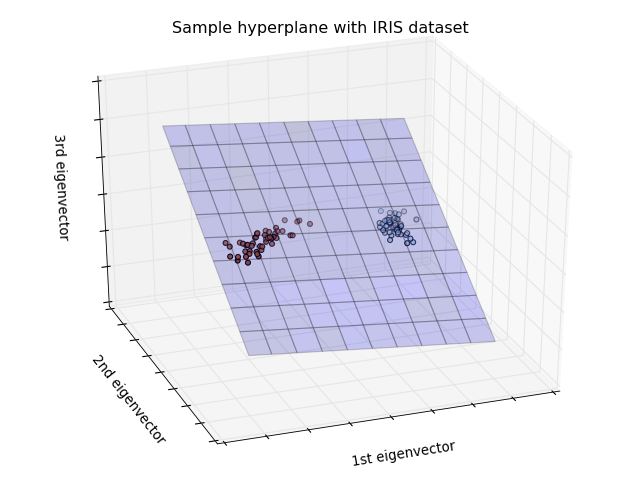

In [44]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

iris = load_iris()
X_reduced = PCA(n_components=3).fit_transform(iris.data[:100])
Y = iris.target[:100]


svm = HuberSVM(X_reduced.shape[0])
svm.fit(X_reduced, Y)

#w = np.ones(X_reduced.shape[1])
w = np.array([0.5,3,1])
print(svm.compute_obj(w))
print(svm.compute_grad(w))
print(grad_checker(svm.compute_obj,w))

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)

ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=Y,
           cmap=plt.cm.Paired)
ax.set_title("Sample hyperplane with IRIS dataset")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

x_cord, y_cord = np.meshgrid(np.linspace(-3,3,100),np.linspace(-3,3,100))
z_cord = -1*(w[0]*x_cord+w[1]*y_cord)/w[2]
ax.plot_surface(x_cord, y_cord, z_cord, alpha=0.2)
plt.show()


In [ ]:
# Gradient Descent